In [1]:
import requests
from tqdm.auto import tqdm
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import bz2

In [2]:
with open('E:\git_exercise\df_nashdomrf.pkl', 'rb') as f:
    df = pkl.load(f)

In [3]:
#Добавляем столбец с годом
df['objReady100PercDt'] = pd.to_datetime(df['objReady100PercDt'])
df['year_'] = df['objReady100PercDt'].dt.strftime('%Y')

In [4]:
class_df = df[['region','objPriceAvg','objSquareLiving','objFloorCnt','objFlatCnt','objFlatSq','objInfrstrObjPrkngCnt','year_']].copy()
class_df.to_csv('E:\git_exercise\class_df.csv',sep=';',index=False)

In [7]:
class CSVReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_csv(self):
        with open(self.file_path, 'r') as csv_file:
            reader = csv.reader(csv_file)
            for row in reader:
                yield row

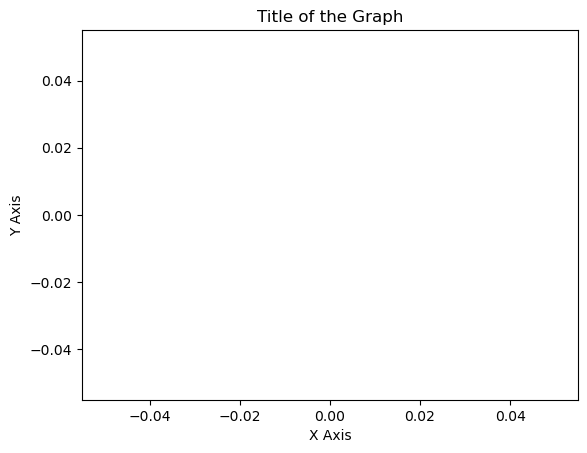

In [52]:
class CSVReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_csv(self):
        with open(self.file_path, 'r') as csv_file:
            reader = csv.reader(csv_file)
            for row in reader:
                yield row

    def plot_graph(self, x_column, y_column, x_label, y_label, title):
        rows = list(self.read_csv())
        x_values = [row[x_column] for row in rows if len(row) > 1]
        y_values = [row[y_column] for row in rows if len(row) > 1]
        plt.plot(x_values, y_values)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()

# Создание экземпляра класса
csv_reader = CSVReader('E:/git_exercise/class_df.csv')

# Построение графика
csv_reader.plot_graph(0, 1, 'X Axis', 'Y Axis', 'Title of the Graph')